# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [1]:
# !pip install joypy

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joypy

import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
try:
    df = pd.read_csv('diabetes_prediction_dataset.csv') 
except FileNotFoundError:
    print("You have to load the file to the directory before opening it.")

In [ ]:
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

## Удаление дубликатов

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [ ]:
print(f'Количество дубликатов: {df[df.duplicated()].shape[0]}')

Количество дубликатов: 3854


In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
df.shape

(96146, 9)

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [ ]:
df.shape

(96146, 9)

In [ ]:
df.describe()

age  hypertension  heart_disease           bmi   hba1c_level  \
count  96146.000000  96146.000000   96146.000000  96146.000000  96146.000000   
mean      41.794326      0.077601       0.040803     27.321461      5.532609   
std       22.462948      0.267544       0.197833      6.767716      1.073232   
min        0.080000      0.000000       0.000000     10.010000      3.500000   
25%       24.000000      0.000000       0.000000     23.400000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     29.860000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes  
count         96146.000000  96146.000000  
mean            138.218231      0.088220  
std              40.909771      0.283616  
min              80.000000      0.000000  
25%             100.000000      0.000000  
50%             140.000000      0.000000  
75%             159.000000      0.000000  
max             300.000000      1.000000

In [ ]:
num_features = df.select_dtypes(include='number')

In [ ]:
var_ = num_features.var().to_frame(name='var')
unique = num_features.nunique().to_frame(name='unique')
pd.concat([var_, unique], join='outer', axis=1)

var  unique
age                   504.584014     102
hypertension            0.071580       2
heart_disease           0.039138       2
bmi                    45.801974    4247
hba1c_level             1.151827      18
blood_glucose_level  1673.609393      18
diabetes                0.080438       2

Высокая дисперсия по столбцам age и blood_glucose_level.

In [ ]:
df.age.value_counts().sort_values()

age
0.08       36
0.16       59
0.40       66
1.00       83
0.48       83
         ... 
53.00    1498
48.00    1508
47.00    1511
51.00    1566
80.00    4932
Name: count, Length: 102, dtype: int64

Есть странные значения в виде неполных лет. Большое количество значений содержит возраст 80 лет.

Посмотрим столбцы blood_glucose_level и hba1c_level.

In [ ]:
df.blood_glucose_level.value_counts().to_frame().sort_values(by='blood_glucose_level').reset_index()

blood_glucose_level  count
0                    80   6786
1                    85   6632
2                    90   6822
3                   100   6774
4                   126   7421
5                   130   7471
6                   140   7416
7                   145   7371
8                   155   7285
9                   158   6739
10                  159   7478
11                  160   7397
12                  200   7290
13                  220    600
14                  240    633
15                  260    634
16                  280    724
17                  300    673

In [ ]:
df.hba1c_level.value_counts().to_frame().sort_values(by='hba1c_level').reset_index()

hba1c_level  count
0           3.5   7319
1           4.0   7205
2           4.5   7290
3           4.8   7296
4           5.0   7155
5           5.7   8124
6           5.8   7992
7           6.0   7988
8           6.1   7716
9           6.2   7958
10          6.5   8051
11          6.6   8164
12          6.8    642
13          7.0    633
14          7.5    642
15          8.2    659
16          8.8    660
17          9.0    652

Оба столбца имеют по 18 значений и очень похоже распределены, скорее всего есть связь между уровнем гемоглобина и глюкозы.

In [ ]:
IQR = num_features.quantile(0.25).to_frame(name='Q1')
IQR['Q3'] = num_features.quantile(0.75)
IQR['iqr'] = IQR['Q3'] - IQR['Q1']
IQR['ejections+'] = IQR['Q3'] + IQR['iqr'] * 1.5
IQR['ejections-'] = IQR['Q1'] - IQR['iqr'] * 1.5
IQR

Q1      Q3    iqr  ejections+  ejections-
age                   24.0   59.00  35.00      111.50      -28.50
hypertension           0.0    0.00   0.00        0.00        0.00
heart_disease          0.0    0.00   0.00        0.00        0.00
bmi                   23.4   29.86   6.46       39.55       13.71
hba1c_level            4.8    6.20   1.40        8.30        2.70
blood_glucose_level  100.0  159.00  59.00      247.50       11.50
diabetes               0.0    0.00   0.00        0.00        0.00

Критических выбросов нет.
- Есть по столбцу bmi, все значения выше 38.505 и ниже 14.705 выбросы.
- И по столбцу blood_glucose_level значения выше 247.500.

In [ ]:
df.describe(include='object')

gender smoking_history
count    96146           96146
unique       3               6
top     Female           never
freq     56161           34398

Посмотрим, сколько процентов приходится на каждое уникальное значение.

In [ ]:
cat_features = df.select_dtypes(include='object').columns
for col in cat_features:
    print(f'Столбец {100* (df[col].value_counts() / df.shape[0]).round(5)}', end='\n\n')

Столбец gender
Female    58.412
Male      41.569
Other      0.019
Name: count, dtype: float64

Столбец smoking_history
never          35.777
No Info        34.205
former          9.672
current         9.566
not current     6.622
ever            4.158
Name: count, dtype: float64



**Вывод:**
- Данные не содержат пропуски.
- После удаления дубликатов датасет состоит из 96 146 строк и 9 столбцов.
- Датасет содержит небольшие выбросы по 2 столбцам: blood_glucose_level и bmi.
- Столбец таргет - diabetes содержит 2 значения (1 и 0), более 75% данных имеют нулевое значение.
- Средний возраст (столбец age) пациента 42 года. Есть дробные значения возраста.
Дисперсия высокая, это говорит о разбросе данных.
- Столбцы hypertension и heart_disease содержат по 2 уникальных значения (1 и 0),
минимум 75% наблюдений имеют нулевое значение.
- Столбец bmi распределение близкое к нормальному. В нем большое количество (5% от размера датасета) уникальных значений.
Среднее значение - 27 (то есть в среднем в датасете  пациенты с избыточным весом).
- Столбец hba1c_level - на первый взгляд нормальное распределение, но значения находятся в промежутке от 3.5 до 9.
- Столбец blood_glucose_level, как и предыдущий, имеет 18 уникальных значений, но они находятся в промежутке от 80 до 300.
Между 75% квартилем и максимумом большой разрыв. Данные в столбце не распределены нормально.
- Столбец smoking_history содержит 6 уникальных значений, самое частое из них "нет информации" занимает 35% датасета.
- Столбец gender содержит 3 значения, значения Other менее 0.1% от датасета.



## Предобработка данных

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
hba1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

В датасете нет пропусков.

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

Столбцы с двумя уникальными значениями 1 и 0 заменим на булевый тип.

In [ ]:
bool_feat = ['hypertension', 'heart_disease', 'diabetes']
df[bool_feat] = df[bool_feat].astype('bool')

Для столбцов с целыми значениями подберем подходящий размер (для экономии памяти).

In [ ]:
for el in num_features:
    for n_type in (np.int32, np.int16, np.int8):
        if (df[el] == df[el].astype(n_type)).sum() == len(df):
            df[el] = df[el].astype(n_type)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96146 entries, 0 to 96145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int8   
 3   heart_disease        96146 non-null  int8   
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   hba1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int16  
 8   diabetes             96146 non-null  int8   
dtypes: float64(3), int16(1), int8(3), object(2)
memory usage: 4.1+ MB


**Вывод:**

После предобработки датасет состоит из 96 146 строк и 9 столбцов, и не содержит пропусков.

Столбцы hypertension, diabetes, heart_disease содержат бинарные значения.
У столбцов bmi распределение близкое к нормальному.
У столбцов hba1c_level и blood_glucose_level возможна сильная корреляция.

С данными можно провести следующую работу:
- Столбец bmi можно разбить на категории, так как в нем большое количество уникальных значений.
- В cтолбце gender вероятно можно удалить или перезаполнить значения Other, если они не коррелируют с таргетом.
- В столбце age разобраться с не целыми значениями.
- Разобраться с выбросами.


## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

##### Гистограммы и диаграммы выбросов для числовых переменных.

Text(0.5, 0, 'возраст пациента')

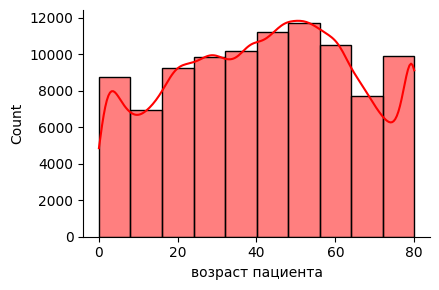

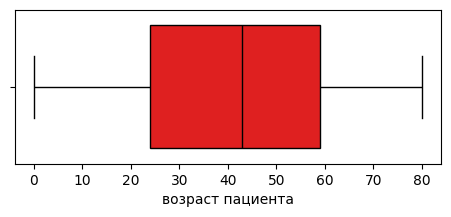

In [ ]:
sns.displot(df, x='age', kde=True, bins=10, color='red',
            aspect=1.5, height=3)
plt.xlabel('возраст пациента')

plt.figure(figsize=(5.5,2))
sns.boxplot(df, x='age', color='red', linecolor='black')
plt.xlabel('возраст пациента')

*Вывод:* по графику видно, что распределение по возрасту не нормальное.

Есть всплески значений в районе 80 и 2-3 лет.

Можно сказать, что выборка по возрасту достаточно репрезентативная.

Text(0.5, 9.444444444444459, 'индекс жира')

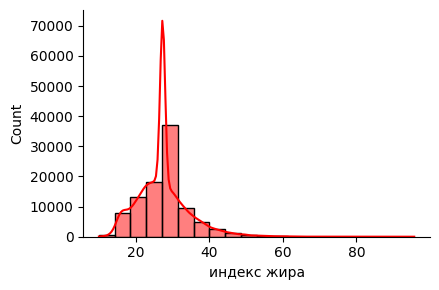

In [ ]:
sns.displot(df, x='bmi', kde=True, bins=20, color='red',
            aspect=1.5, height=3)
plt.xlabel('индекс жира')

Text(0.5, 0, 'индекс жира')

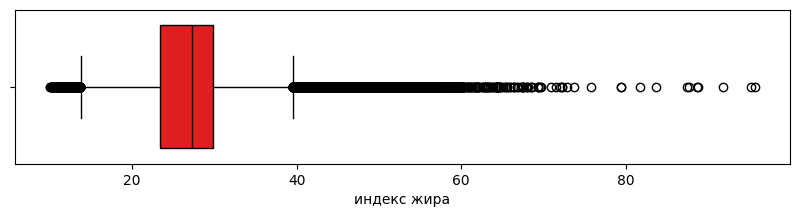

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(df, x='bmi', color='red', linecolor='black')
plt.xlabel('индекс жира')

In [ ]:
display(f'Количество пациентов с индексом bmi > 70: {df.loc[df.bmi > 70].shape[0]}')
df.loc[(df.bmi > 70) & (df.diabetes == 1), ['diabetes']]

'Количество пациентов с индексом bmi > 70: 19'

diabetes
4540          1
23921         1
28290         1
56933         1
69403         1
79551         1

*Вывод:* По коэффициенту bmi наблюдается распределение, близкое к нормальному.

Есть небольшие выбросы по значениям свыше 70-ти, но видно, что у четверти (6 из 19) этих людей диабет.

Также видно, что треть значений имеет высокий показатель, то есть треть пациентов имеет избыточный вес.

<Axes: xlabel='blood_glucose_level'>

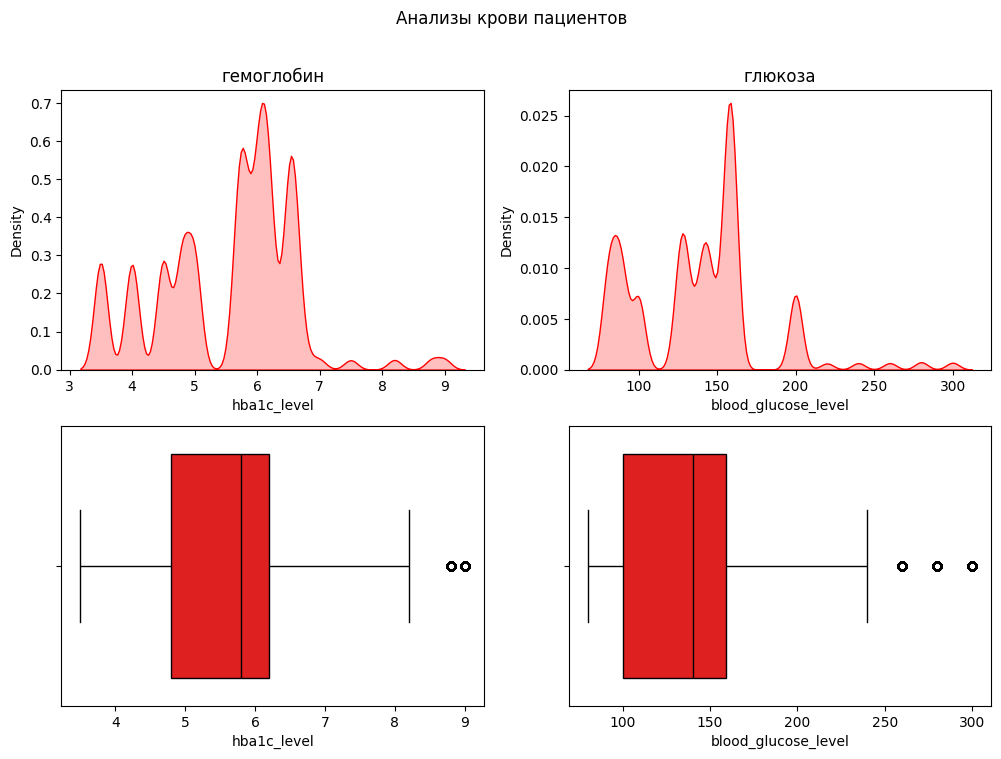

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Анализы крови пациентов')

sns.kdeplot(df.hba1c_level, ax=ax[0, 0], color='red', fill=True)
ax[0, 0].set_title('гемоглобин')
sns.kdeplot(df.blood_glucose_level, ax=ax[0, 1], color='red', fill=True)
ax[0, 1].set_title('глюкоза')
sns.boxplot(df, x='hba1c_level', ax=ax[1, 0], color='red', linecolor='black')
sns.boxplot(df, x='blood_glucose_level', ax=ax[1, 1], color='red', linecolor='black')

Вывод: данные графики схожи тем, что есть определенный всплекс и затем угасание в сторону больших значений признака.
Действительно, уровень гемоглобина в крови связан с уровнем глюкозы.

##### Диаграммы для категориальных переменных.

In [ ]:
x = df.gender.value_counts()

Text(0.5, 0, 'пол пациента')

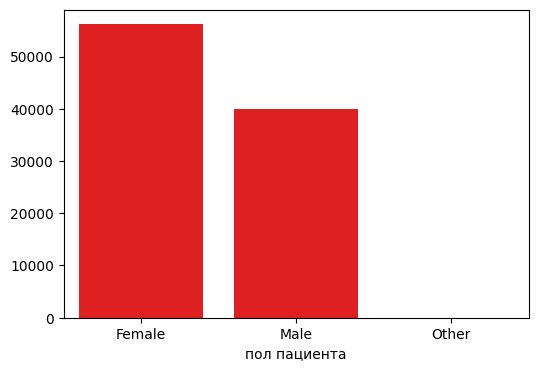

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=x.index, y=x.values, color='red')
plt.xlabel('пол пациента')

*Вывод:* пол пациента содержит три уникальных значения, женский пол превалирует.

Значения "другие" может означать отсутствие информации о поле пациента.

In [ ]:
x = df.smoking_history.value_counts()

Text(0.5, 0, 'Курит ли пациент?')

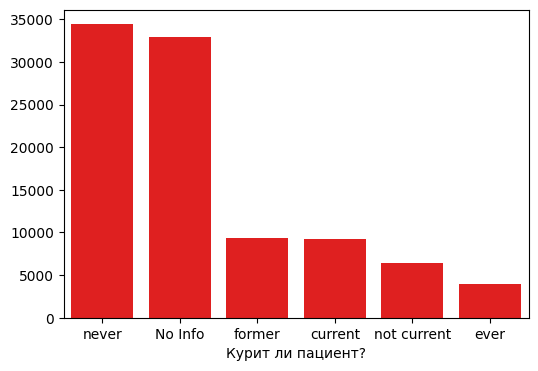

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=x.index, y=x.values, color='red')
plt.xlabel('Курит ли пациент?')

*Вывод:* треть пациентов не курит, по трети пациентов нет информации.

ВОПРОС: стоит ли восстанавливать значения (например, линейной регрессией), если такое количество скажем так пропусков?

In [ ]:
x = df.hypertension.value_counts()
x1 = df.heart_disease.value_counts()

Text(0.5, 1.0, 'болезни сердца')

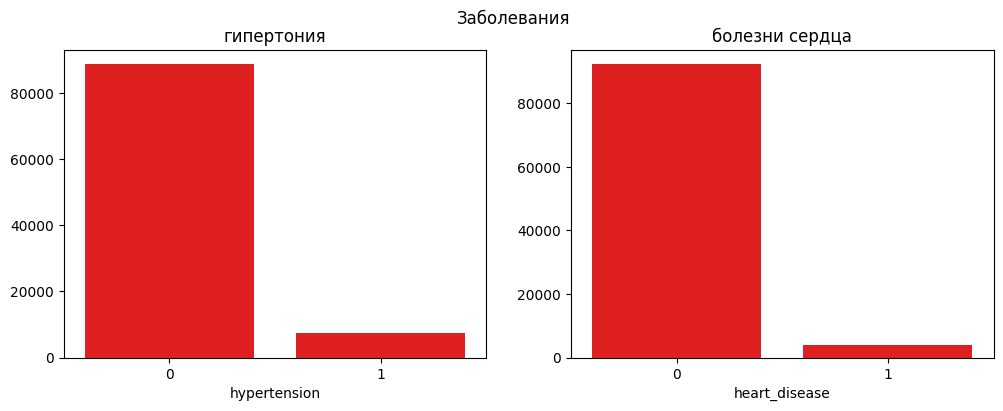

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Заболевания')

sns.barplot(x=x.index, y=x.values, ax=ax[0], color='red')
ax[0].set_title('гипертония')

sns.barplot(x=x1.index, y=x1.values, ax=ax[1], color='red')
ax[1].set_title('болезни сердца')

*Вывод*: у большей части пациентов нет данных сопутствующих заболеваний.

Гипертония у пациентов встречается чаще, чем болезни сердца.

In [ ]:
x = df.diabetes.value_counts()

Text(0.5, 0, 'Диагноз диабет')

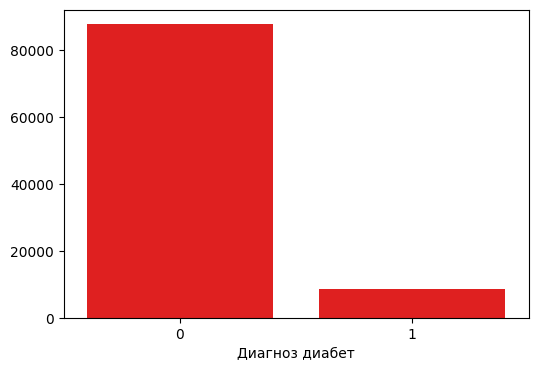

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=x.index, y=x.values, color='red')
plt.xlabel('Диагноз диабет')

*Вывод:* данные по таргету разбалансированы, пациентов с диагнозом диабет представлено в разы меньше, чем с отсутствием его.

##### Матрица корреляции признаков Пирсона

<Axes: >

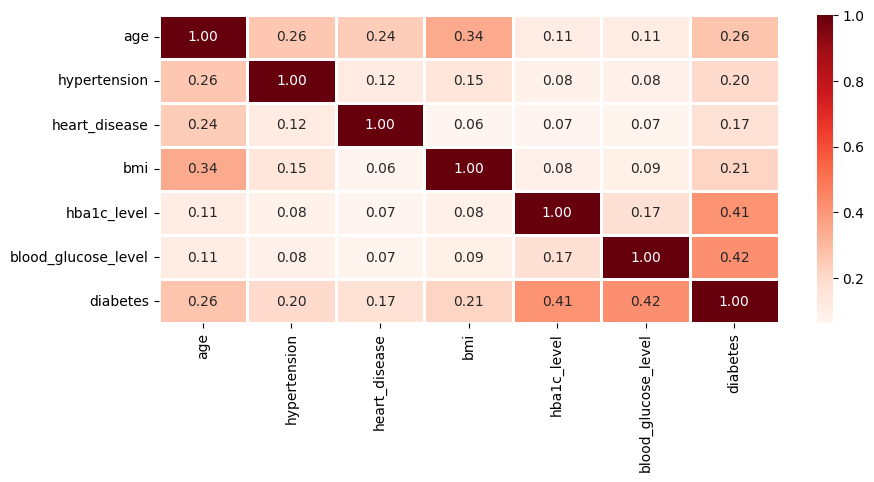

In [ ]:
num_features = df.select_dtypes(include='number')
plt.figure(figsize=(10,4))
sns.heatmap(num_features.corr(), annot = True, linewidths=.8, fmt='.2f',\
            cmap = 'Reds')

*Вывод:* существует слабая корреляция между диабетом и показателями анализа крови: гемоглобин и глюкоза.

Возраст, гипертония, болезни сердца и лишний вес имеют очень слабую связь с риском диабета.

Связь диабета с полом пациента и курильщик ли он корреляцией Пирсона не посмотреть.

Между признаками возраст и коэффициент жира есть слабая корреляция.

**Вывод:**
Классы целевой переменной "диабет" разбалансированы.

На наличие диагноза оказывают влияние все числовые и бинарные признаки.

Больше других влияют показатели глюкозы и гемоглобина, которые также связаны между собой.

Существует корреляция между возрастом и коэффициентом жира, также возраст связан с заболеваниями сердца и гипертонией.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

##### Гистограммы и ящики с усами для числовых признаков + таргет

Text(0.5, 1.0, 'возраст')

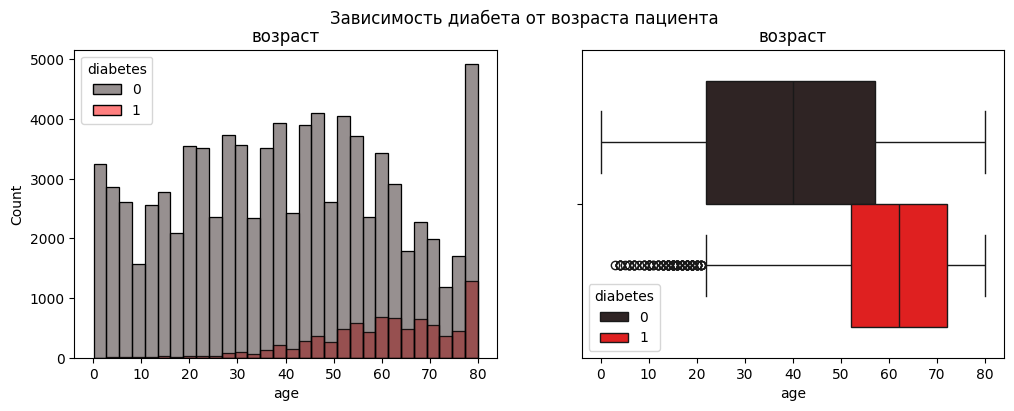

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Зависимость диабета от возраста пациента')

sns.histplot(df, x='age', hue='diabetes', ax=ax[0],
             bins=30, palette='dark:red')
ax[0].set_title('возраст')
sns.boxplot(df, x='age', hue='diabetes', ax=ax[1],
            palette='dark:red')
ax[1].set_title('возраст')

*Вывод:* зависимость диабета и возраста очевидна. После 30 лет увеличивается количество заболевших.

Text(0.5, 1.0, 'индекс жира')

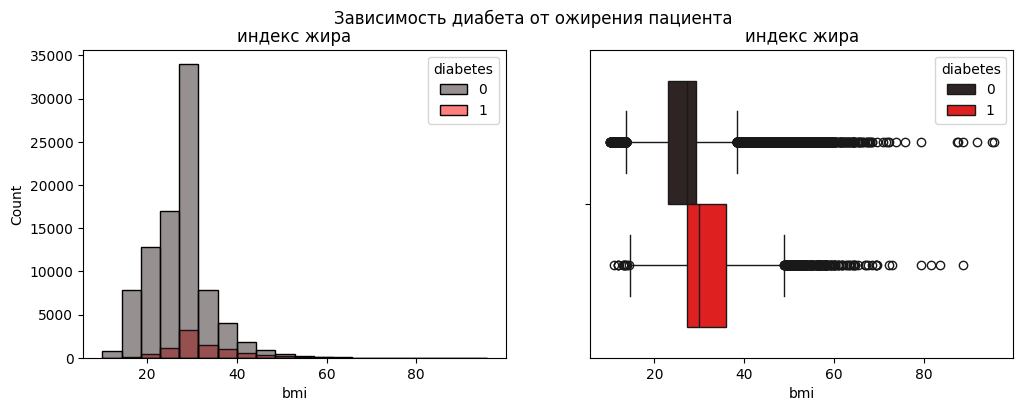

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Зависимость диабета от ожирения пациента')

sns.histplot(df, x='bmi', hue='diabetes', bins=20,
             ax=ax[0], palette='dark:red')
ax[0].set_title('индекс жира')
sns.boxplot(df, x='bmi', hue='diabetes', ax=ax[1], palette='dark:red')
ax[1].set_title('индекс жира')

*Вывод:* зависимость диабета от избыточного веса присутствует.

Text(0.5, 1.0, 'уровень глюкозы')

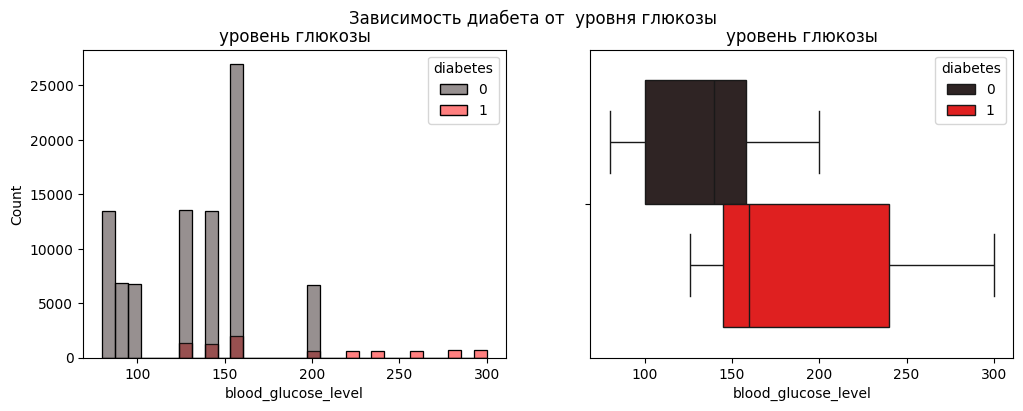

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Зависимость диабета от  уровня глюкозы')

sns.histplot(df, x='blood_glucose_level', hue='diabetes', ax=ax[0],
             bins=30, palette='dark:red')
ax[0].set_title('уровень глюкозы')
sns.boxplot(df, x='blood_glucose_level', hue='diabetes',
            ax=ax[1], palette='dark:red')
ax[1].set_title('уровень глюкозы')


Text(0.5, 1.0, 'гемоглобин')

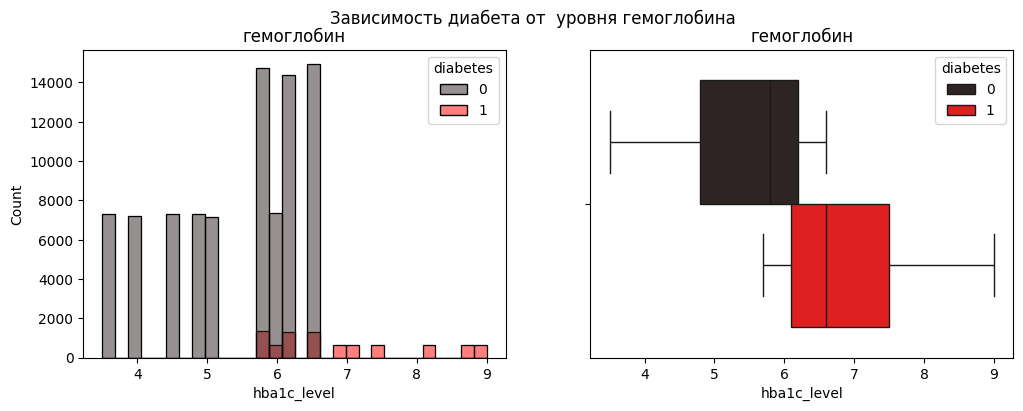

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Зависимость диабета от  уровня гемоглобина')

sns.histplot(df, x='hba1c_level', hue='diabetes', bins=30, ax=ax[0], palette='dark:red')
ax[0].set_title('гемоглобин')
sns.boxplot(df, x='hba1c_level', hue='diabetes', ax=ax[1], palette='dark:red')
ax[1].set_title('гемоглобин')

*Вывод*: по графикм связь между уровнем гемоглобина и глюкозы с диабетом очевидна.

##### Столбчатые диаграммы для категориальных и бинарных признаков + таргет

Text(0.5, 29.000000000000007, 'пол')

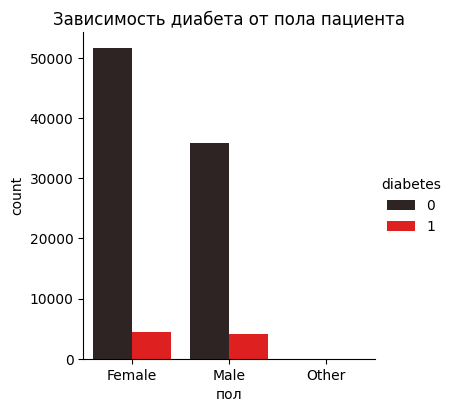

In [ ]:
sns.catplot(x='gender', hue = 'diabetes', kind = 'count', data = df,
            palette='dark:red', height=4)
plt.title('Зависимость диабета от пола пациента')
plt.xlabel('пол')

In [ ]:
df.loc[(df.gender == 'Female') & (df.diabetes == 1)].shape[0]

4447

In [ ]:
df.loc[(df.gender == 'Male') & (df.diabetes == 1)].shape[0]

4035

*Вывод:* Небольшая зависимость диабета от пола все же есть, так как женщин в датасете больше, чем мужчин. а количество заболевших почти одинаково.

Text(0.5, 29.140624999999986, 'курит ли пациент?')

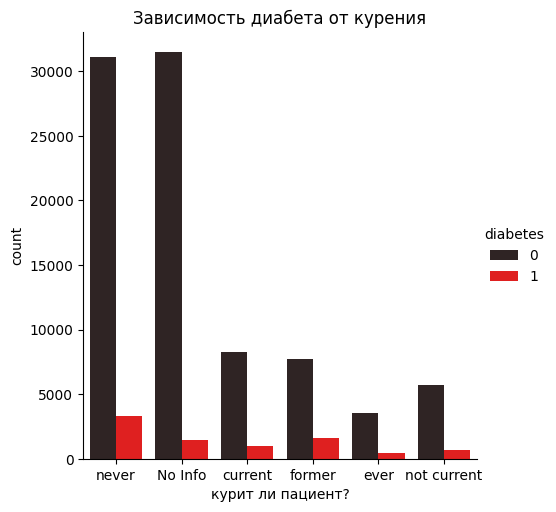

In [ ]:
sns.catplot(x='smoking_history', hue = 'diabetes', kind = 'count',
            data = df, palette='dark:red', height=5)
plt.title('Зависимость диабета от курения')
plt.xlabel('курит ли пациент?')

*Вывод:* небольшая зависимость курения и диабета есть.  

Text(0.5, 29.140625000000007, 'болезни сердца')

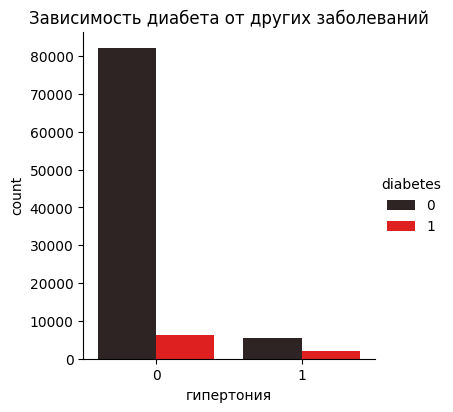

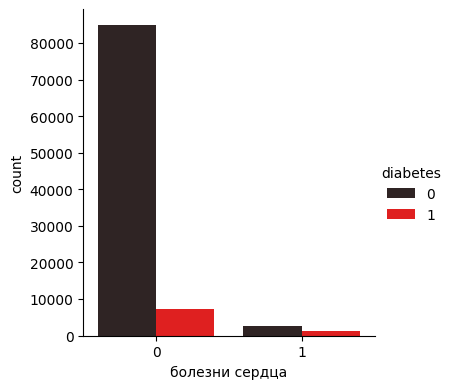

In [ ]:
sns.catplot(x='hypertension', hue = 'diabetes', kind = 'count', data = df,
            palette='dark:red', height=4)
plt.title('Зависимость диабета от других заболеваний')
plt.xlabel('гипертония')

sns.catplot(x='heart_disease', hue = 'diabetes', kind = 'count', data = df,
            palette='dark:red', height=4)
plt.xlabel('болезни сердца')

In [ ]:
hyper = df.loc[(df.hypertension == 1), ['diabetes']]
(hyper.value_counts() / len(hyper) * 100).round(2)


diabetes
0           72.04
1           27.96
Name: count, dtype: float64

In [ ]:
heart = df.loc[(df.heart_disease == 1), ['diabetes']]
(heart.value_counts() / len(heart) * 100).round(2)

diabetes
0           67.7
1           32.3
Name: count, dtype: float64

*Вывод:* зависимость диабета и других заболеваний (гипертония, болезни сердца) существует.

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

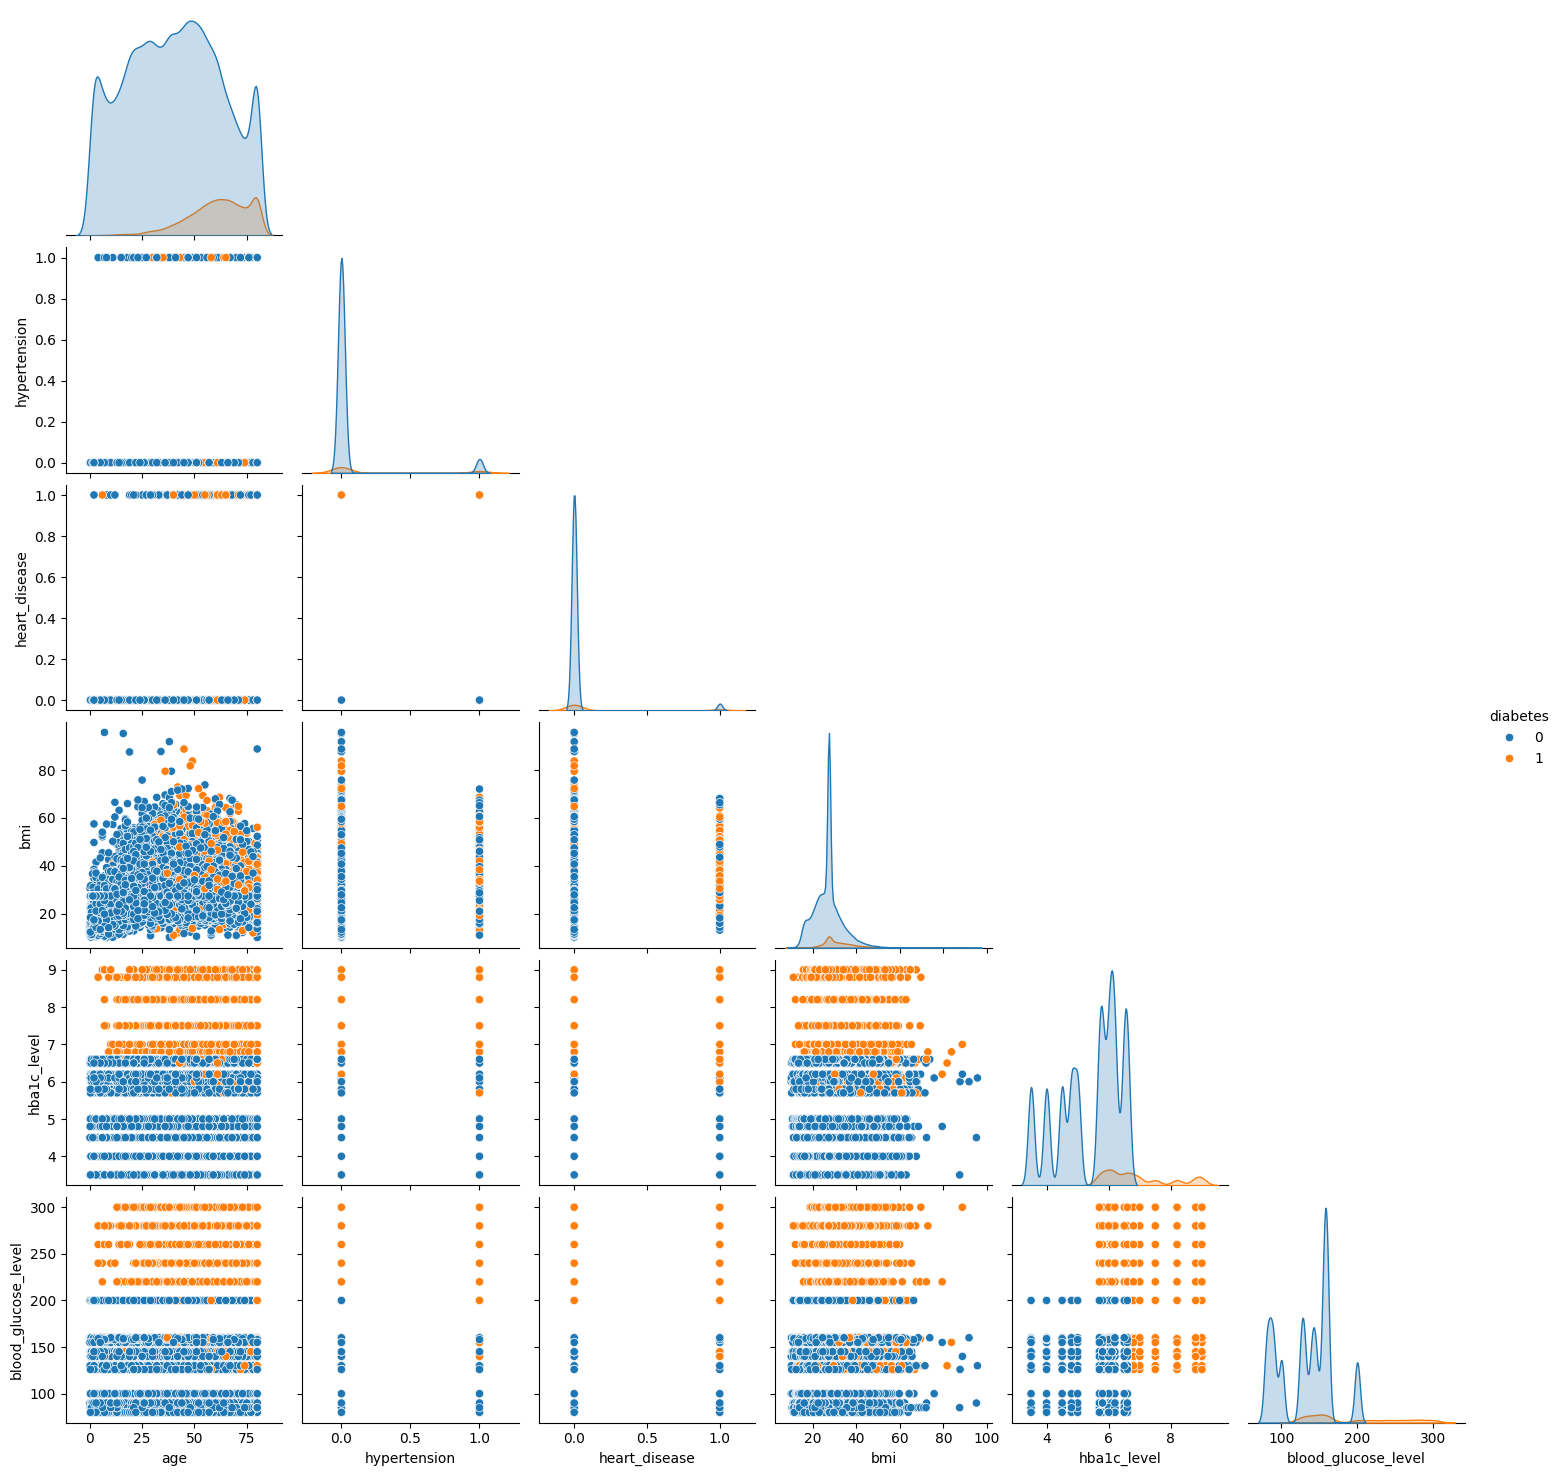

In [ ]:
sns.pairplot(df, corner=True, hue='diabetes')

Из графиков можно сделать следующие выводы:
- возрастая, уровень глюкозы и гемоглобин становятся 100% риском диабета;
- заболевания сердца и гипертония усугубляют риск диабета, но не являются ключевыми факторами;
- лишний вес влияет на риск диабета, но есть пациенты и с нормальным весом;
- влияние возраст на риск диабета начинается с 45-50 лет.


Рассмотрим эти признаки ближе.

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

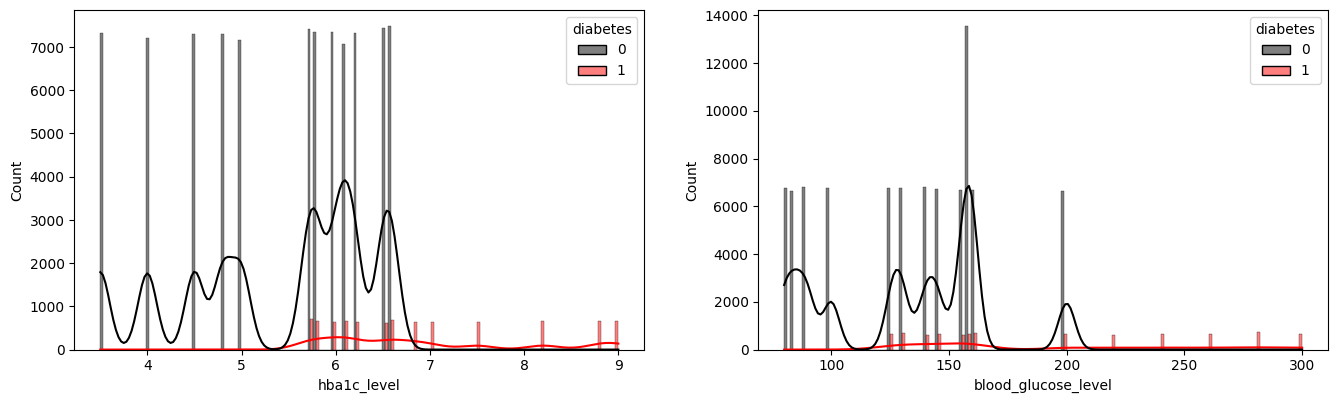

In [ ]:
plt.figure(figsize = [25, 15])

plt.subplot(3, 3, 1)
sns.histplot(data = df, x = 'hba1c_level', hue = 'diabetes', multiple  = 'dodge',
             palette={0: 'black', 1: 'red'}, kde=True)
plt.subplot(3, 3, 2)
sns.histplot(data = df, x = 'blood_glucose_level', hue = 'diabetes',
             multiple  = 'dodge', palette={0: 'black', 1: 'red'}, kde=True)

In [ ]:
print(f'Пациентов без диабета с гемоглобином больше 6.6: \
{df.loc[(df.hba1c_level > 6.6) & (df.diabetes == 0)].shape[0]}\n\
Пациентов без диабета с глюкозой больше 200: \
{df.loc[(df.blood_glucose_level > 200) & (df.diabetes == 0)].shape[0]}')

Пациентов без диабета с гемоглобином больше 6.6: 0
Пациентов без диабета с глюкозой больше 200: 0


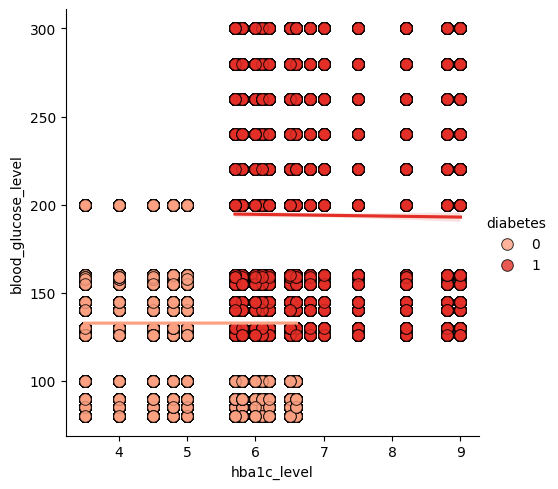

In [ ]:
sns.lmplot(x="hba1c_level", y="blood_glucose_level", hue="diabetes", data=df, 
                     height=5, palette='Reds', 
                     scatter_kws=dict(s=70, linewidths=.7, edgecolors='black'))

*Вывод*: уровень глюкозы и гемоглобина безусловно сильно связаны с диабетом.

Рассмотрим признаки, описыващие пациента.

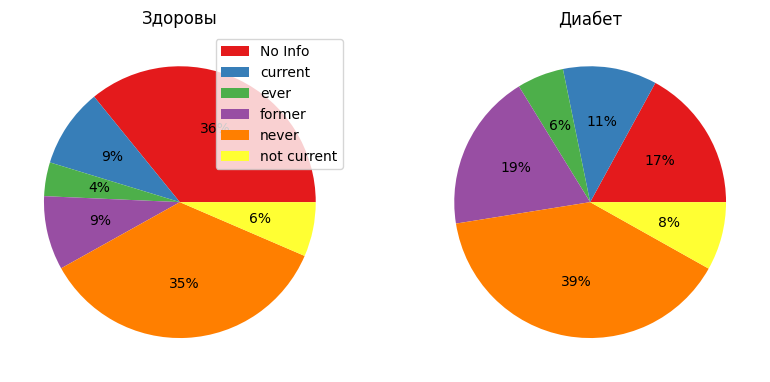

In [ ]:
plt.figure(figsize = [15, 15])
colors = sns.color_palette('Set1')


plt.subplot(3, 3, 1)
plt.title('Здоровы')
x = df.loc[df.diabetes  == 0].groupby('smoking_history').diabetes.count()
plt.pie(x, colors= colors, radius= 1, autopct='%.0f%%')
plt.legend(x.index)

plt.subplot(3, 3, 2)
x1 = df.loc[df.diabetes  == 1].groupby('smoking_history').diabetes.count()
plt.pie(x1, colors= colors, radius= 1, autopct='%.0f%%')
plt.title('Диабет')
plt.show()

У заболевших пациентов доля бывших курильщив возрастает в 2 раза. Интересно объединить курящих когда-либо в одну группу. А также посмотрим пациентов от 14 лет, так как возраст меньше заведомо не курящие пациенты.

In [ ]:
df.loc[(df.smoking_history  != 'No Info') & (df.smoking_history != 'never')\
        & (df.smoking_history != 'not current') & (df.age < 14)].reset_index().tail()

index  gender   age  hypertension  heart_disease smoking_history    bmi  \
34  84355  Female   6.0             0              0            ever  15.28   
35  90637    Male   4.0             0              0         current  16.70   
36  94695  Female   1.4             0              0         current  19.53   
37  95091    Male   6.0             0              0         current  24.09   
38  96094    Male  13.0             0              0         current  21.81   

    hba1c_level  blood_glucose_level  diabetes  
34          3.5                  140         0  
35          4.0                  158         0  
36          5.8                   80         0  
37          6.0                  155         0  
38          4.8                   90         0

В данных содержатся скорее всего ошибочные записи о курильщиках в возрасте 4 или 6 лет. Но таких записей всего 39.

In [ ]:
x1 = df.loc[(df.smoking_history  != 'No Info') & (df.smoking_history != 'never')\
             & (df.smoking_history != 'not current') & (df.age > 14)]\
                .groupby('diabetes')['smoking_history'].count().to_frame(name='smoke').reset_index()\
                    .merge(df.loc[(df.smoking_history  == 'No Info') | (df.smoking_history == 'never')\
                      & (df.smoking_history == 'never') & (df.age > 14)]\
                        .groupby('diabetes')['smoking_history'].count().to_frame(name='no smoke'), on='diabetes')
x1

diabetes  smoke  no smoke
0         0  19438     60328
1         1   3008      4764

Text(0.5, 1.0, 'не курильщик')

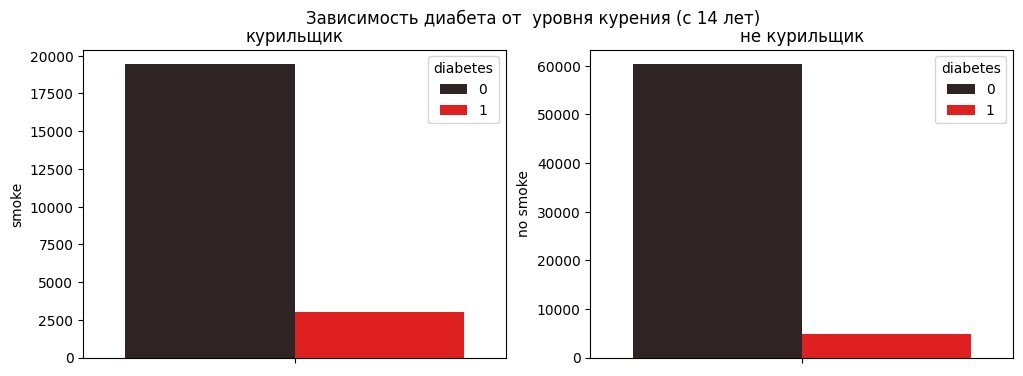

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Зависимость диабета от  уровня курения (c 14 лет)')

sns.barplot(data=x1, y='smoke', hue='diabetes', ax=ax[0], palette='dark:red')
ax[0].set_title('курильщик')
sns.barplot(data=x1, y='no smoke', hue='diabetes', ax=ax[1], palette='dark:red')
ax[1].set_title('не курильщик')

*Вывод:* при формировании отдельной группы для курящих когда-либо выявлено, что курение оказывает влияние на развитие у пациентов диабета.Диабетиков среди курящих в два раза больше, чем среди не курящих.

In [ ]:
fig = px.scatter(df, y="age", x="bmi", color="diabetes",
                 color_continuous_scale='tealrose',
                 title='Взаимосвязь диабета, возраста и индекса жира')
fig.show()

In [ ]:
df.age.value_counts(bins=10).sort_values(ascending=False).to_frame()

count
(48.032, 56.024]   11714
(40.04, 48.032]    11233
(56.024, 64.016]   10499
(32.048, 40.04]    10205
(72.008, 80.0]      9920
(24.056, 32.048]    9883
(16.064, 24.056]    9247
(-0.00092, 8.072]   8749
(64.016, 72.008]    7736
(8.072, 16.064]     6960

In [ ]:
plt.figure(figsize = [12, 6])
fig = px.histogram(df, x='age',
                    y='diabetes', color='gender', nbins=25,
                    color_discrete_map={'Other':'green', 'Male':'gray','Female':'red'},
                    title='Взаимосвязь диабета, возраста и пола пациента')
fig.update_layout(bargap=0.01) 
fig.show()

<Figure size 1200x600 with 0 Axes>

На данном графике видно, что взаимосвязи пола и диабета нет.

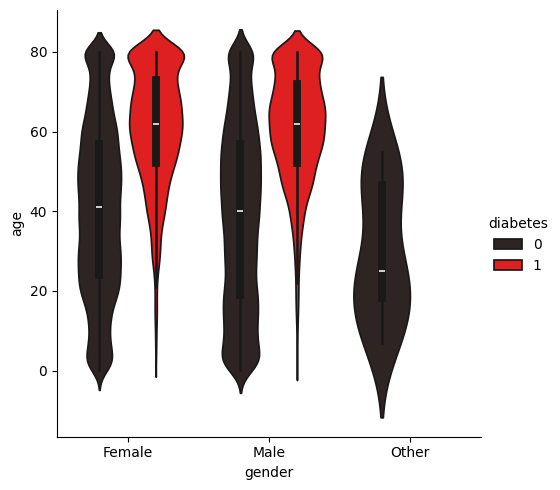

In [ ]:
sns.catplot(df, x="gender", y="age", hue="diabetes", palette='dark:red', kind='violin')


In [ ]:
df.bmi.value_counts().sort_values(ascending=False).head().to_frame()

count
bmi         
27.32  21666
23.00    103
27.12    101
24.96    100
27.80    100

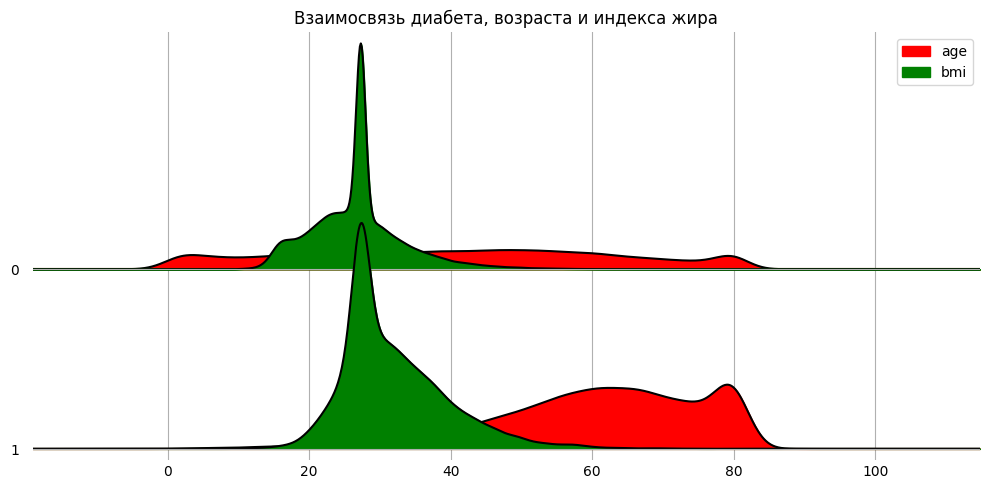

In [ ]:
fig, axes = joypy.joyplot(df, column=['age', 'bmi'], by="diabetes", ylim='own',\
                          figsize=(10,5), title='Взаимосвязь диабета, возраста и индекса жира',\
                            legend=True, color=['red', 'green'], grid=True)

*Вывод:* диабет не зависит от пола пациента. Но однозначно зависит от его возраста и лишнего веса.

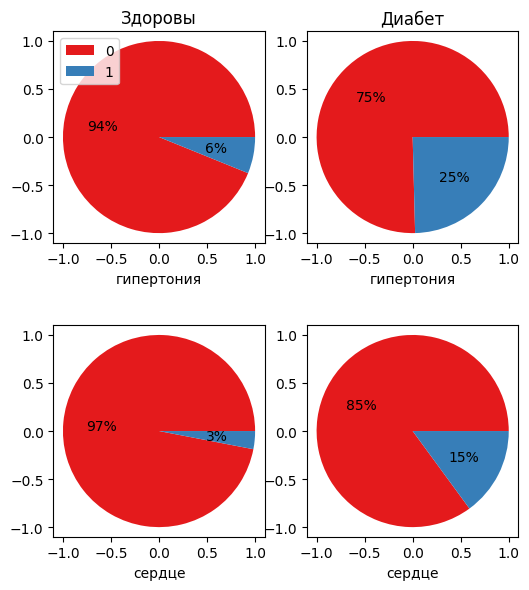

In [ ]:
plt.figure(figsize = [6, 7])
colors = sns.color_palette('Set1')


plt.subplot(2, 2, 1)
plt.title('Здоровы')
x = df.loc[df.diabetes  == 0].groupby('hypertension').diabetes.count()
plt.pie(x, colors= colors, frame=True, autopct='%.0f%%')
plt.xlabel('гипертония')
plt.legend(x.index)

plt.subplot(2, 2, 2)
x1 = df.loc[df.diabetes  == 1].groupby('hypertension').diabetes.count()
plt.pie(x1, colors= colors, frame=True, autopct='%.0f%%')
plt.title('Диабет')
plt.xlabel('гипертония')

plt.subplot(2, 2, 3)
x = df.loc[df.diabetes  == 0].groupby('heart_disease').diabetes.count()
plt.pie(x, colors= colors, frame=True, autopct='%.0f%%')
plt.xlabel('сердце')

plt.subplot(2, 2, 4)
x1 = df.loc[df.diabetes  == 1].groupby('heart_disease').diabetes.count()
plt.pie(x1, colors= colors, frame=True, autopct='%.0f%%')
plt.xlabel('сердце')


plt.show()

*Вывод:* такие заболевания как гипертония и болезни сердца являются факторами риска получить диабет, так как у четверти диабетиков есть гипертония и у олдной шестой болезни сердца. В то время как у здорового пациента эти показатели менее 6%.

##### Матрица корреляции признаков Phik

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes']


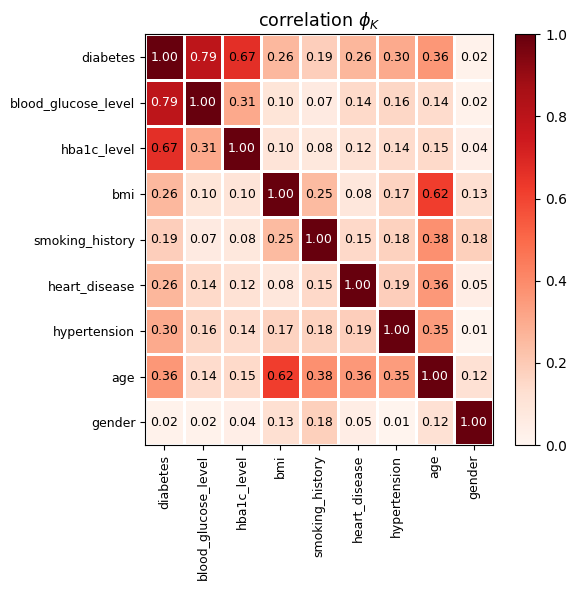

In [ ]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Reds", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(6, 6))
plt.tight_layout()

*Вывод:* существует высокая корреляция между риском диабета и показателями анализа крови: гемоглобин и глюкоза.

Уровень гемоглобина и глюкозы имеют слабую корреляцию.

Возраст и риск диабета имеют слабую корреляюцию.

С остальными признаками наблюдается очень слабая корреляция.

Пол пациента мало влияет на риск диабета.

Между признаками возраст и индекс жира высокая корреляция, также возраст связан с гипертонией и болезнями сердца.

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

**Вывод:**
На основании данного датасета можно выделить следующие основные факторы риска возникновения диабета у людей:
- повышенный уровень глюкозы в крови;
- повышенный гемоглобин.

Дополнительными факторами риска являются:
- возраст свыше 50 лет;
- курение (в том числе и бросившие курить);
- лишний вес;
- заболевания сердца и гипертония.

Надо отметить, что уровень гемоглобина и глюкозы являются первыми анализами для определения у пациента диабета.